In [18]:
import numpy as np
import pickle
import stages
import dimer_stages as stages_dim
import matplotlib.pyplot as plt

In [19]:
import dimer_stages_config as config

sim_list = config.sim_list


states_infty = []
pstates_infty_2 = []
for sim in sim_list:
    f = open(f"data/mcsolve-lambda={sim.lmbd_1}-Nt=10000-T=10-dt=0.01-omega0=1.pkl", "rb")
    data = pickle.load(f)
    f.close()

    f = open(f"data/dimer-check-lmbd_1={sim.lmbd_1:.1f}-lmbd_2={sim.lmbd_2:.1f}-Nt={sim.Nt}-T={sim.T}-dt={sim.dt}.pkl", "rb")
    data_2 = pickle.load(f)
    f.close()

    states_infty.append(data[1].states[:,-1])

    pstates = []
    for state_2 in data_2[1].states[:,-1]:
        pstates.append(state_2.ptrace(0))
    pstates_infty_2.append(pstates)
    


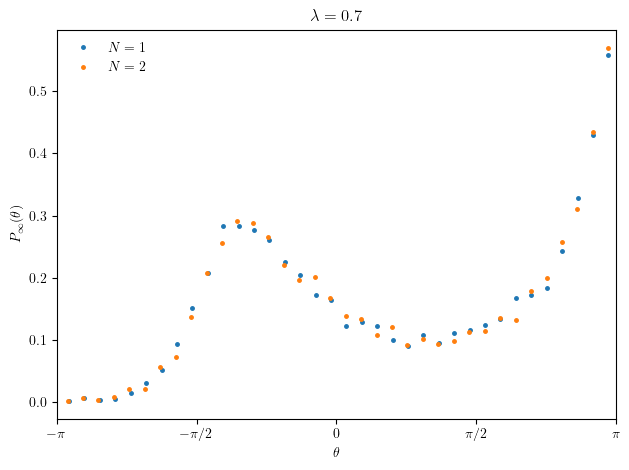

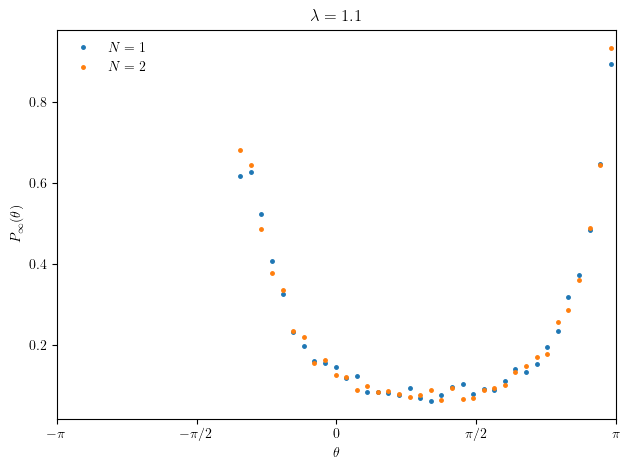

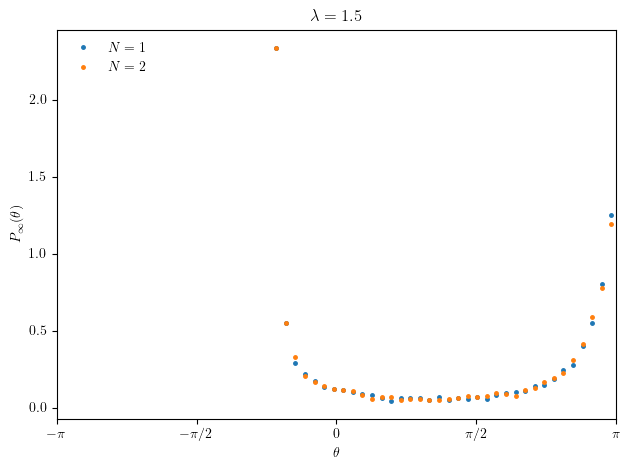

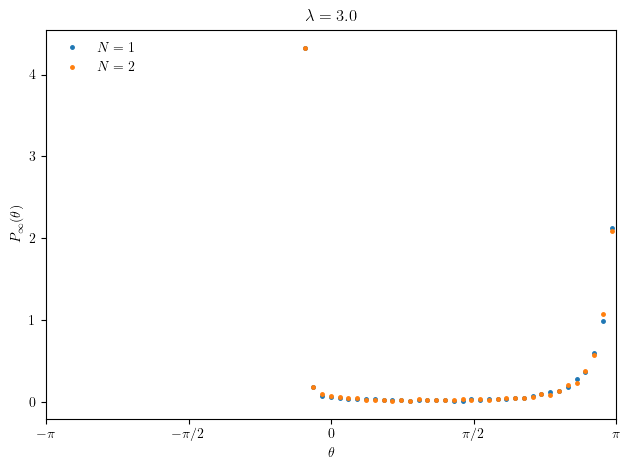

In [21]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for i, sim in enumerate(sim_list):
    plt.figure()

    thetas = []
    for state in states_infty[i]:
        thetas.append(stages.state_to_theta(state))

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / np.sum(counts) / bin_width

    thetas_2 = []
    for pstate_2 in pstates_infty_2[i]:
        thetas_2.append(stages_dim.state_to_theta(pstate_2))

    counts_2, bins_2 = np.histogram(thetas_2, 36)
    bin_width_2 = bins_2[1] - bins_2[0]
    freqs_2 = counts_2 / np.sum(counts_2) / bin_width_2

    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=rf"$N = 1$")
    plt.plot(bins_2[:-1] + bin_width_2/2, freqs_2, ".", label=rf"$N = 2$")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend(loc="upper left")
    plt.title(rf"$\lambda = {sim.lmbd_1}$")

    plt.tight_layout()

    plt.savefig(f"plots/N=1-vs-N=2-lambda1={sim.lmbd_1}-Nt={sim.Nt}T={sim.T}.pdf")